# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached flatbuffers-23.1.21-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached grpcio-1.51.1-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached gast-0.4.0-py3-none-

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ok\AppData\Local\Temp\pip-install-_x_r_yco\tensorflow-gpu_b9e876c1edf74ed9a592589d04d3b5a1\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not ru

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [4]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached grpcio-1.51.1-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth-2.16.1-py2.py3-none-any.whl (177 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Usi

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [75]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [76]:
data_iterator = data.as_numpy_iterator()

In [77]:
batch = data_iterator.next()

In [78]:
batch[0].max()

255.0

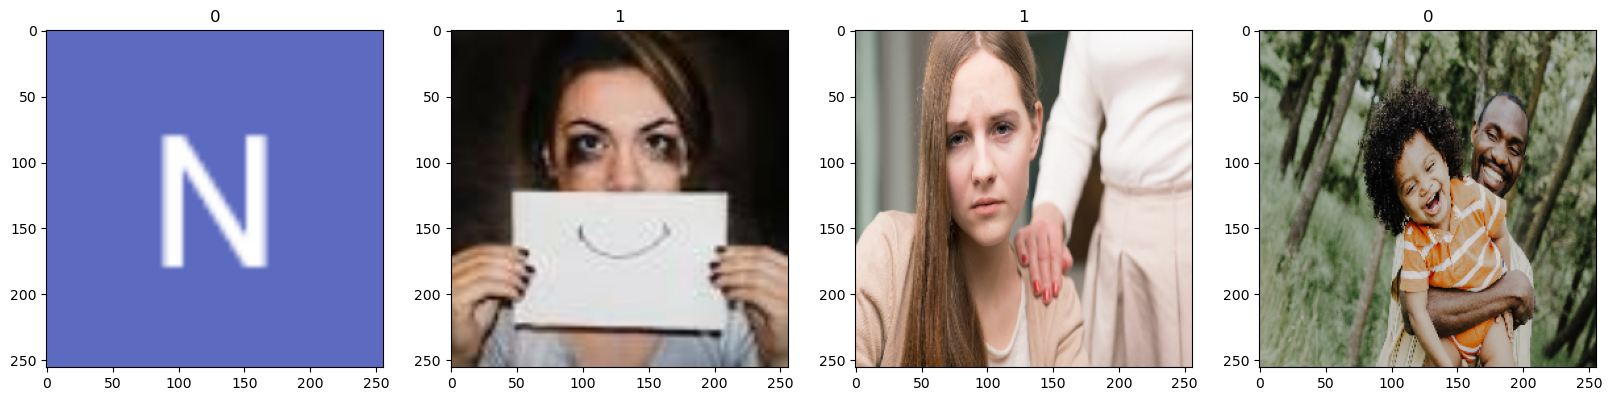

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [80]:
data = data.map(lambda x,y: (x/255, y))

In [81]:
batch[0].max()

255.0

In [82]:
data.as_numpy_iterator().next()

(array([[[[0.8862745 , 0.6784314 , 0.5137255 ],
          [0.8862745 , 0.68081343, 0.52087164],
          [0.8876302 , 0.6878049 , 0.5310004 ],
          ...,
          [0.82259345, 0.6304366 , 0.51278955],
          [0.8368566 , 0.64469975, 0.5270527 ],
          [0.8463848 , 0.6542279 , 0.53658086]],
 
         [[0.88602173, 0.6784314 , 0.514231  ],
          [0.88602173, 0.6811205 , 0.5212236 ],
          [0.88729006, 0.68954957, 0.53514546],
          ...,
          [0.79103404, 0.5988772 , 0.48123014],
          [0.80368483, 0.611528  , 0.4938809 ],
          [0.81290597, 0.62074906, 0.503102  ]],
 
         [[0.88151044, 0.6792739 , 0.52241117],
          [0.88125455, 0.68616414, 0.52691936],
          [0.88138044, 0.6958945 , 0.5381129 ],
          ...,
          [0.7564799 , 0.564323  , 0.446676  ],
          [0.76467067, 0.5725138 , 0.45486677],
          [0.7691789 , 0.5770221 , 0.459375  ]],
 
         ...,
 
         [[0.5371247 , 0.5724188 , 0.49006587],
          [0.72802

In [83]:
len(data)

10

# 5. Split Data

In [131]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [132]:
test_size+train_size+val_size

10

In [133]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [134]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [136]:
model = Sequential()

In [137]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [138]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [139]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [140]:
logdir='logs'

In [141]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [142]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 20s 2s/step - loss: 0.7626 - accuracy: 0.5089 - val_loss: 0.6404 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 0.6390 - accuracy: 0.6205 - val_loss: 0.5875 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 21s 3s/step - loss: 0.5768 - accuracy: 0.7991 - val_loss: 0.4743 - val_accuracy: 0.8594
Epoch 4/20
7/7 [==============================] - 19s 2s/step - loss: 0.4166 - accuracy: 0.8304 - val_loss: 0.2974 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 21s 2s/step - loss: 0.3279 - accuracy: 0.8527 - val_loss: 0.3091 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 23s 3s/step - loss: 0.2336 - accuracy: 0.9420 - val_loss: 0.1865 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 24s 3s/step - loss: 0.1367 - accuracy: 0.9732 - val_loss: 0.0560 - val_accuracy: 0.9844
Epoch 8/20
7/7 [==================

# 8. Plot Performance

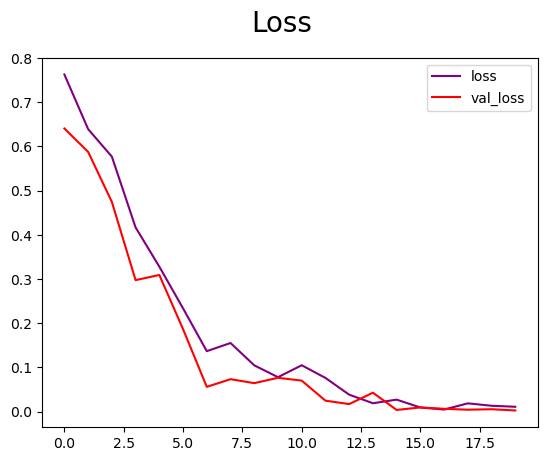

In [143]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='purple', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

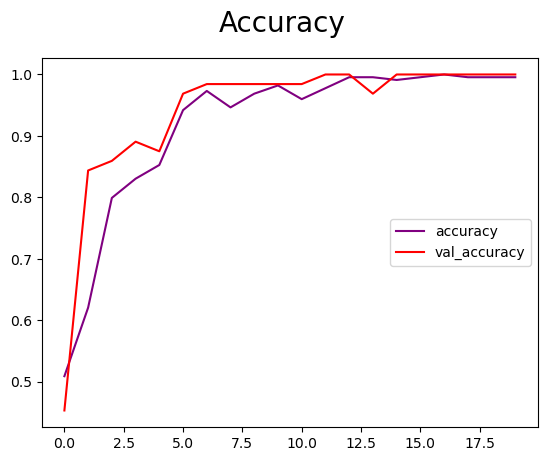

In [144]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='purple', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="right")
plt.show()

# 9. Evaluate

In [145]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [146]:
prec = Precision()
rec = Recall()
biacc = BinaryAccuracy()

In [147]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    output = model.predict(X)
    prec.update_state(y,output )
    rec.update_state(y, output)
    biacc.update_state(y, output)

1/1 [==============================] - 1s 1s/step


In [148]:
print(f'PRECISION:{prec.result().numpy()}, Recall{ rec.result().numpy()},  BinaryAccuracy{biacc.result().numpy()}')

PRECISION:1.0, Recall1.0,  BinaryAccuracy1.0


# 10. Test

In [149]:
import cv2

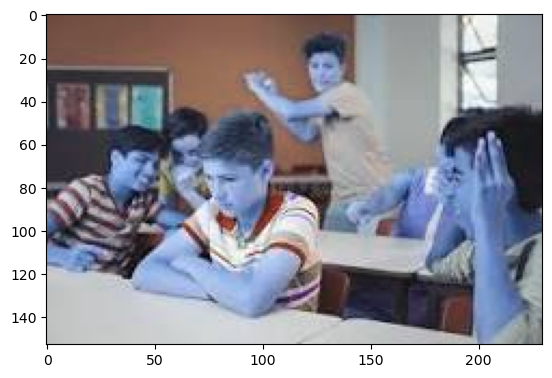

In [156]:
img = cv2.imread('sadtest.jpg')
plt.imshow(img)
plt.show()

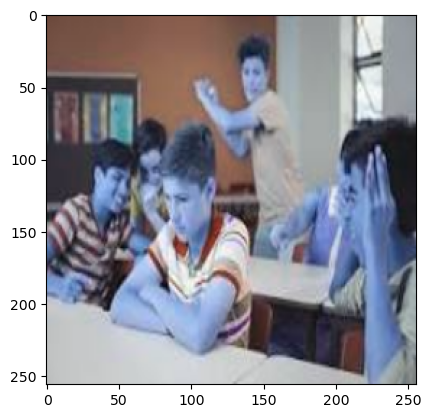

In [157]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [158]:
output = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 156ms/step


In [159]:
output

array([[0.9279772]], dtype=float32)

In [160]:
if output > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [161]:
from tensorflow.keras.models import load_model

In [162]:
model.save(os.path.join('models','imageclassifier.h5'))

In [165]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [166]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 250ms/step


array([[0.9279772]], dtype=float32)